In [1]:
!pip install keras_vggface
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import cv2
# import os
# import pickle
# import numpy as np
# from PIL import Image

# import matplotlib.pyplot as plt

# headshots_folder_name = '/content/drive/MyDrive/Face Recognition Sistem Parkir V3/output'

# # dimension of images
# image_width = 224
# image_height = 224

# # for detecting faces
# facecascade = cv2.CascadeClassifier('/content/drive/MyDrive/Face Recognition Sistem Parkir V3/haarcascade_frontalface_default.xml')

# # set the directory containing the images
# images_dir = os.path.join(".", headshots_folder_name)

# current_id = 0
# label_ids = {}

# # iterates through all the files in each subdirectories
# for root, _, files in os.walk(images_dir):
#     for file in files:
#         if file.endswith("png") or file.endswith("jpg") or file.endswith("jpeg"):
#         # path of the image
#             path = os.path.join(root, file)

#         # get the label name (name of the person)
#         label = os.path.basename(root).replace(" ", ".").lower()

#         # add the label (key) and its number (value)
#         if not label in label_ids:
#             label_ids[label] = current_id
#             current_id += 1

#         # load the image
#         imgtest = cv2.imread(path, cv2.IMREAD_COLOR)
#         image_array = np.array(imgtest, "uint8")

#         # get the faces detected in the image
#         faces =  facecascade.detectMultiScale(imgtest,
#             scaleFactor=1.1, minNeighbors=5)

#         # if not exactly 1 face is detected, skip this photo
#         if len(faces) != 1:
#             print(f'---Photo skipped---\n')
#         # remove the original image
#             os.remove(path)
#             continue

#         # save the detected face(s) and associate
#         # them with the label
#         for (x_, y_, w, h) in faces:

#             # draw the face detected
#             face_detect = cv2.rectangle(imgtest,
#                     (x_, y_),
#                     (x_+w, y_+h),
#                     (255, 0, 255), 2)
#             plt.imshow(face_detect)
#             plt.show()

#             # resize the detected face to 224x224
#             size = (image_width, image_height)

#             # detected face region
#             roi = image_array[y_: y_ + h, x_: x_ + w]

#             # resize the detected head to target size
#             resized_image = cv2.resize(roi, size)
#             image_array = np.array(resized_image, "uint8")

#             # remove the original image
#             os.remove(path)

#             # replace the image with only the face
#             im = Image.fromarray(image_array)
#             im.save(path)

In [3]:
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Convolution2D, Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [9]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      brightness_range=[0,1],
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = \
    train_datagen.flow_from_directory(
'/content/drive/MyDrive/Face Recognition Sistem Parkir V3/output/train',
target_size=(224,224),
batch_size=32,
class_mode='categorical')

valid_generator = \
    validation_datagen.flow_from_directory(
'/content/drive/MyDrive/Face Recognition Sistem Parkir V3/output/test',
target_size=(224,224),
batch_size=32,
class_mode='categorical')

train_images, train_labels = next(train_generator)
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images, test_labels = next(valid_generator)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Found 687 images belonging to 20 classes.
Found 160 images belonging to 20 classes.


In [ ]:
# train_datagen = ImageDataGenerator(
#       rescale=1./255,
#       rotation_range=45,
#       width_shift_range=0.3,
#       height_shift_range=0.3,
#       horizontal_flip=True,
#       fill_mode='nearest')

# validation_datagen = ImageDataGenerator(rescale=1/255)

# train_generator = \
#     train_datagen.flow_from_directory(
# '/content/drive/MyDrive/Face Recognition Sistem Parkir V3/output/train',
# target_size=(224,224),
# batch_size=32,
# class_mode='categorical')

# valid_generator = \
#     validation_datagen.flow_from_directory(
# '/content/drive/MyDrive/Face Recognition Sistem Parkir V3/output/test',
# target_size=(224,224),
# batch_size=32,
# class_mode='categorical')

Found 687 images belonging to 20 classes.
Found 160 images belonging to 20 classes.


In [10]:
train_generator.class_indices.values()
# dict_values([0, 1, 2])
NO_CLASSES = len(train_generator.class_indices.values())

In [16]:
from keras_vggface.vggface import VGGFace
base_model = VGGFace(include_top=True,
model='vgg16',
input_shape=(224, 224, 3))
base_model.summary()

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [7]:
from keras_vggface.vggface import VGGFace
base_model1 = VGGFace(include_top=True,
model='vgg16',
input_shape=(224, 224, 3))

# Create a list to store the layers until 'fc7'
layers_until_pool3 = []

# Iterate through the layers of the original model
for layer in base_model1.layers:
    layers_until_pool3.append(layer)
    if layer.name == 'pool3':
        break

# Create a new model containing layers until 'fc7'
base_model1 = Model(inputs=base_model1.input, outputs=layers_until_pool3[-1].output)

base_model1.summary()
print(len(base_model1.layers))
# 26 layers after excluding the last few layers

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [11]:
x1 = base_model1.output
x1 = Convolution2D(128,(3,3),activation='relu')(x1)
x1 = BatchNormalization()(x1)
x1 = GlobalAveragePooling2D()(x1)

x1 = Dense(64, activation='relu')(x1)
x1 = Dense(32, activation='relu')(x1)

# final layer with softmax activation
preds1 = Dense(NO_CLASSES, activation='softmax')(x1)

model1 = Model(inputs = base_model1.input, outputs = preds1, name='Model I')

# don't train the first 19 layers - 0..18
for layer in model1.layers[:11]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model1.layers[11:]:
    layer.trainable = True

model1.summary()

Model: "Model I"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [ ]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

lr_schedule = LearningRateScheduler(lambda epoch: 0.01 / 10**(epoch / 5))

model1.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

EPOCHS = 100

# Train the model
history1=model1.fit(
      train_generator,
      epochs=EPOCHS,validation_data=(valid_generator),
      verbose=2,callbacks=[earlystop])

Epoch 1/100
22/22 - 15s - loss: 2.8719 - accuracy: 0.1354 - val_loss: 3.8737 - val_accuracy: 0.0750 - 15s/epoch - 669ms/step
Epoch 2/100
22/22 - 13s - loss: 2.6812 - accuracy: 0.2402 - val_loss: 3.0914 - val_accuracy: 0.2062 - 13s/epoch - 581ms/step
Epoch 3/100
22/22 - 13s - loss: 2.4719 - accuracy: 0.3159 - val_loss: 2.8927 - val_accuracy: 0.2625 - 13s/epoch - 581ms/step
Epoch 4/100
22/22 - 12s - loss: 2.3354 - accuracy: 0.3537 - val_loss: 2.3295 - val_accuracy: 0.4375 - 12s/epoch - 564ms/step
Epoch 5/100
22/22 - 13s - loss: 2.1301 - accuracy: 0.3974 - val_loss: 2.2056 - val_accuracy: 0.3875 - 13s/epoch - 580ms/step
Epoch 6/100
22/22 - 13s - loss: 1.9215 - accuracy: 0.4745 - val_loss: 2.1071 - val_accuracy: 0.4125 - 13s/epoch - 574ms/step
Epoch 7/100
22/22 - 13s - loss: 1.7950 - accuracy: 0.5007 - val_loss: 1.5816 - val_accuracy: 0.5813 - 13s/epoch - 581ms/step
Epoch 8/100
22/22 - 13s - loss: 1.6806 - accuracy: 0.5488 - val_loss: 1.7612 - val_accuracy: 0.5250 - 13s/epoch - 570ms/step


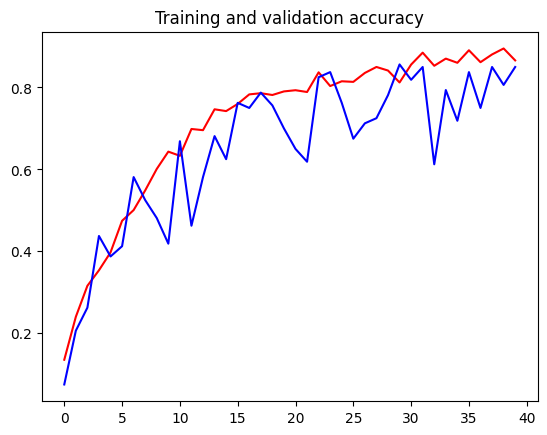

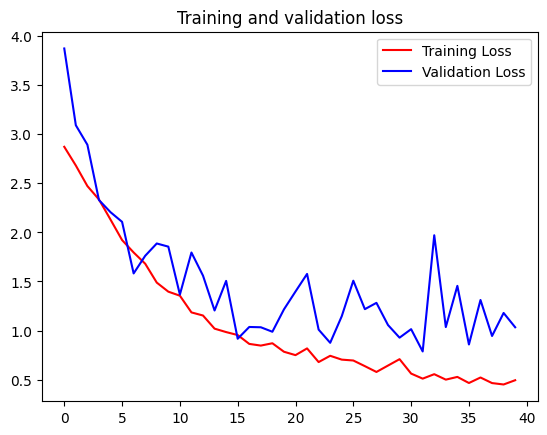

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
score1 = model1.evaluate(valid_generator, verbose = 0)

print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.9270223379135132
Test accuracy: 0.856249988079071


In [ ]:
# creates a HDF5 file
model1.save(
    '/content/drive/MyDrive/Face Recognition Sistem Parkir V3/transfer_learning_trained' +
    '_face_cnn_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
base_model2 = VGGFace(include_top=True,
model='vgg16',
input_shape=(224, 224, 3))

# Create a list to store the layers until 'fc7'
layers_until_fc7 = []

# Iterate through the layers of the original model
for layer in base_model2.layers:
    layers_until_fc7.append(layer)
    if layer.name == 'fc7/relu':
        break

# Create a new model containing layers until 'fc7'
base_model2 = Model(inputs=base_model2.input, outputs=layers_until_fc7[-1].output)

base_model2.summary()
print(len(base_model2.layers))
# 26 layers after excluding the last few layers

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [13]:
x2 = base_model2.output

# final layer with softmax activation
preds2 = Dense(NO_CLASSES, activation='softmax')(x2)

model2 = Model(inputs = base_model2.input, outputs = preds2, name='Model II')

# don't train the first 19 layers - 0..18
for layer in model2.layers[:24]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model2.layers[24:]:
    layer.trainable = True

model2.summary()

Model: "Model II"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0  

In [ ]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

lr_schedule = LearningRateScheduler(lambda epoch: 0.01 / 10**(epoch / 5))

model2.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

EPOCHS = 100

# Train the model
history2=model2.fit(
      train_generator,
      epochs=EPOCHS,validation_data=(valid_generator),
      verbose=2,callbacks=[earlystop])

Epoch 1/100
22/22 - 15s - loss: 2.9779 - accuracy: 0.3377 - val_loss: 2.9204 - val_accuracy: 0.5125 - 15s/epoch - 699ms/step
Epoch 2/100
22/22 - 14s - loss: 2.9351 - accuracy: 0.4818 - val_loss: 2.8470 - val_accuracy: 0.5000 - 14s/epoch - 620ms/step
Epoch 3/100
22/22 - 13s - loss: 2.8973 - accuracy: 0.4585 - val_loss: 2.7761 - val_accuracy: 0.5188 - 13s/epoch - 604ms/step
Epoch 4/100
22/22 - 14s - loss: 2.8571 - accuracy: 0.4643 - val_loss: 2.7096 - val_accuracy: 0.5250 - 14s/epoch - 616ms/step
Epoch 5/100
22/22 - 13s - loss: 2.8177 - accuracy: 0.4964 - val_loss: 2.6444 - val_accuracy: 0.5188 - 13s/epoch - 597ms/step
Epoch 6/100
22/22 - 14s - loss: 2.7853 - accuracy: 0.5124 - val_loss: 2.5801 - val_accuracy: 0.5500 - 14s/epoch - 634ms/step
Epoch 7/100
22/22 - 14s - loss: 2.7424 - accuracy: 0.5022 - val_loss: 2.5205 - val_accuracy: 0.5625 - 14s/epoch - 632ms/step
Epoch 8/100
22/22 - 13s - loss: 2.7066 - accuracy: 0.5298 - val_loss: 2.4596 - val_accuracy: 0.5625 - 13s/epoch - 609ms/step


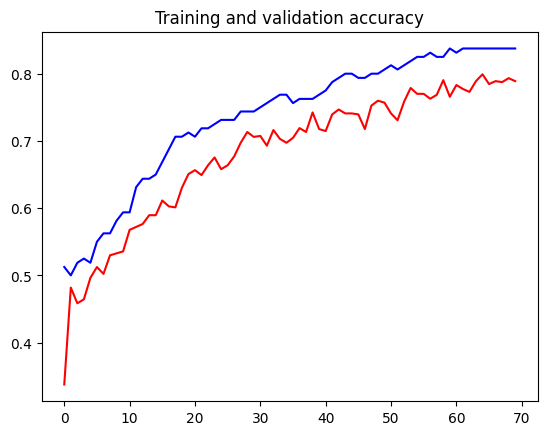

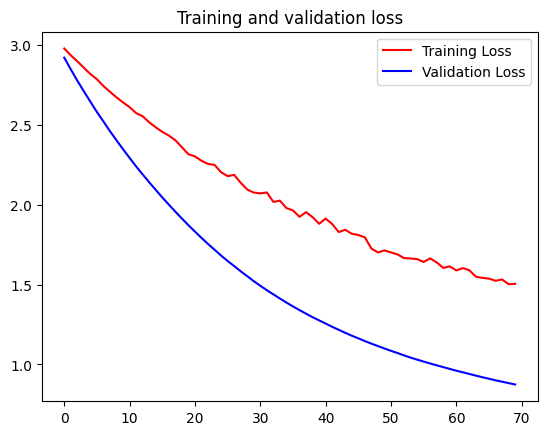

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
score2 = model2.evaluate(valid_generator, verbose = 0)

print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.9717267751693726
Test accuracy: 0.8374999761581421


In [ ]:
# creates a HDF5 file
model2.save(
    '/content/drive/MyDrive/Face Recognition Sistem Parkir V3/transfer_learning_trained' +
    '_face_cnn_model2.h5')

In [ ]:
from keras_vggface.vggface import VGGFace
base_model = VGGFace(include_top=False,
model='vgg16',
input_shape=(224, 224, 3))
base_model.summary()
print(len(base_model.layers))
# 19 layers after excluding the last few layers


58916864/58909280 [==============================] - 4s 0us/step
Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                      

In [ ]:
base_model2 = VGGFace(include_top=True,
model='vgg16',
input_shape=(224, 224, 3))

# Create a list to store the layers until 'fc7'
layers_until_fc7 = []

# Iterate through the layers of the original model
for layer in base_model2.layers:
    layers_until_fc7.append(layer)
    if layer.name == 'fc7/relu':
        break

# Create a new model containing layers until 'fc7'
base_model2 = Model(inputs=base_model2.input, outputs=layers_until_fc7[-1].output)

base_model2.summary()
print(len(base_model2.layers))
# 26 layers after excluding the last few layers


580075520/580070376 [==============================] - 34s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                           

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(NO_CLASSES, activation='softmax')(x)


In [ ]:
x2 = base_model2.output

# final layer with softmax activation
preds2 = Dense(NO_CLASSES, activation='softmax')(x2)

model2 = Model(inputs = base_model2.input, outputs = preds2)

# don't train the first 19 layers - 0..18
for layer in model2.layers[:24]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model2.layers[24:]:
    layer.trainable = True

model2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [ ]:
x2 = base_model2.output

# final layer with softmax activation
preds2 = Dense(NO_CLASSES, activation='softmax')(x2)

model3 = Model(inputs = base_model2.input, outputs = preds2)

# don't train the first 19 layers - 0..18
for layer in model3.layers[:24]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model3.layers[24:]:
    layer.trainable = True

model3.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [ ]:
# # Remove the existing final layer
# base_model2.layers.pop()

# x2 = base_model2.output

# # final layer with softmax activation
# preds2 = Dense(NO_CLASSES, activation='softmax')(x2)

# model2 = Model(inputs = base_model2.input, outputs = preds2)

# # don't train the first 19 layers - 0..18
# for layer in model2.layers:
#     layer.trainable = True

# model2.summary()

In [ ]:
# create a new model with the base model's original input and the
# new model's output
model = Model(inputs = base_model.input, outputs = preds)
model.summary()

# don't train the first 19 layers - 0..18
for layer in model.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[19:]:
    layer.trainable = True

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [ ]:
# create a new model with the base model's original input and the
# new model's output
model1 = Model(inputs = base_model.input, outputs = preds)
model1.summary()

# don't train the first 19 layers - 0..18
for layer in model1.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model1.layers[19:]:
    layer.trainable = True

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [ ]:
# from tensorflow.keras.optimizers import Adam
# adam_optimizer = Adam(learning_rate=0.0001)
# model.compile(optimizer=adam_optimizer,
#     loss='categorical_crossentropy',
#     metrics=['accuracy'])


In [ ]:
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import LearningRateScheduler

# def step_decay(epoch, initial_lr=0.1, drop_rate=0.5, epochs_drop=10):
#     return initial_lr * (drop_rate ** (epoch // epochs_drop))

# lr_scheduler = LearningRateScheduler(step_decay)
# sgd_optimizer = Adam(lr=0.0)  # Initial LR is set to 0.0

# model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# from keras.optimizers import RMSprop
# model.compile(loss = 'categorical_crossentropy',
#               optimizer = RMSprop(learning_rate = 0.001),
#               metrics = ['accuracy'])

In [ ]:
# from keras.optimizers import RMSprop
# model2.compile(loss = 'categorical_crossentropy',
#               optimizer = RMSprop(learning_rate = 0.001),
#               metrics = ['accuracy'])

In [ ]:
# model.fit(train_images, train_labels, validation_data=(test_images,test_labels),
#   verbose = 2,
#   epochs = 100)

In [ ]:
# from tensorflow.keras.callbacks import LearningRateScheduler
# from tensorflow.keras.optimizers import Adam

# def adjust_learning_rate(train_generator,model):

#     lr_schedule = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

#     ### START CODE HERE

#     # Select your optimizer
#     optimizer = Adam()

#     # Compile the model passing in the appropriate loss
#     model.compile(loss='categorical_crossentropy',
#                   optimizer=optimizer,
#                   metrics=["accuracy"])

#     ### END CODE HERE

#     history = model.fit(train_generator, epochs=100, callbacks=[lr_schedule])

#     return history

In [ ]:
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

lr_schedule = LearningRateScheduler(lambda epoch: 0.01 / 10**(epoch / 5))

model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])

EPOCHS = 50

# Train the model
history=model.fit(
      train_generator,
      epochs=EPOCHS,validation_data=(valid_generator),
      verbose=2,callbacks=[earlystop])

Epoch 1/50
22/22 - 15s - loss: 2.9676 - accuracy: 0.0902 - val_loss: 2.8758 - val_accuracy: 0.1562 - 15s/epoch - 698ms/step
Epoch 2/50
22/22 - 14s - loss: 2.8196 - accuracy: 0.1325 - val_loss: 2.5811 - val_accuracy: 0.2062 - 14s/epoch - 617ms/step
Epoch 3/50
22/22 - 13s - loss: 2.5343 - accuracy: 0.2169 - val_loss: 2.3005 - val_accuracy: 0.2688 - 13s/epoch - 610ms/step
Epoch 4/50
22/22 - 14s - loss: 2.3613 - accuracy: 0.2504 - val_loss: 1.9909 - val_accuracy: 0.3688 - 14s/epoch - 615ms/step
Epoch 5/50
22/22 - 13s - loss: 2.1426 - accuracy: 0.3392 - val_loss: 1.7230 - val_accuracy: 0.5312 - 13s/epoch - 609ms/step
Epoch 6/50
22/22 - 13s - loss: 1.9351 - accuracy: 0.3799 - val_loss: 1.6167 - val_accuracy: 0.5312 - 13s/epoch - 607ms/step
Epoch 7/50
22/22 - 13s - loss: 1.8427 - accuracy: 0.4294 - val_loss: 1.5249 - val_accuracy: 0.5500 - 13s/epoch - 587ms/step
Epoch 8/50
22/22 - 14s - loss: 1.6516 - accuracy: 0.4600 - val_loss: 1.3953 - val_accuracy: 0.5625 - 14s/epoch - 616ms/step
Epoch 9/

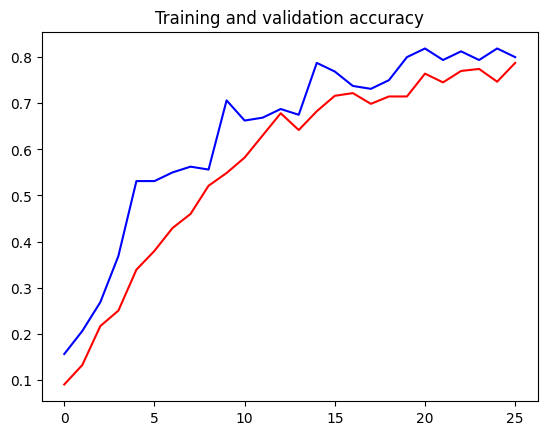

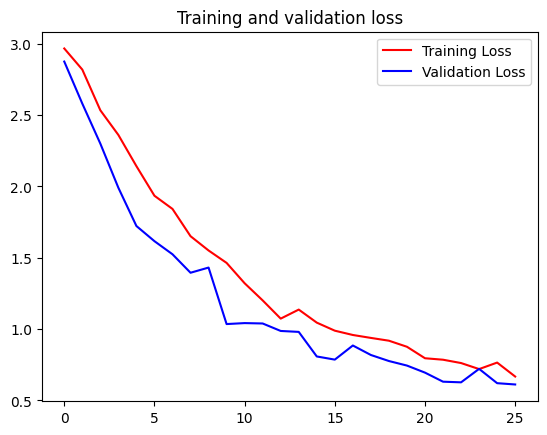

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

lr_schedule = LearningRateScheduler(lambda epoch: 0.01 / 10**(epoch / 5))

model1.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

EPOCHS = 50

# Train the model
history1=model1.fit(
      train_generator,
      epochs=EPOCHS,validation_data=(valid_generator),
      verbose=2,callbacks=[earlystop])

Epoch 1/50
22/22 - 15s - loss: 0.7583 - accuracy: 0.7584 - val_loss: 0.8196 - val_accuracy: 0.7437 - 15s/epoch - 698ms/step
Epoch 2/50
22/22 - 15s - loss: 0.7107 - accuracy: 0.7889 - val_loss: 0.6330 - val_accuracy: 0.8062 - 15s/epoch - 662ms/step
Epoch 3/50
22/22 - 14s - loss: 0.6992 - accuracy: 0.7744 - val_loss: 0.8097 - val_accuracy: 0.7625 - 14s/epoch - 642ms/step
Epoch 4/50
22/22 - 13s - loss: 0.6884 - accuracy: 0.7817 - val_loss: 0.6573 - val_accuracy: 0.8125 - 13s/epoch - 612ms/step
Epoch 5/50
22/22 - 14s - loss: 0.6536 - accuracy: 0.7933 - val_loss: 0.6348 - val_accuracy: 0.8313 - 14s/epoch - 636ms/step
Epoch 6/50
22/22 - 15s - loss: 0.6082 - accuracy: 0.8122 - val_loss: 0.8274 - val_accuracy: 0.7812 - 15s/epoch - 662ms/step
Epoch 7/50
22/22 - 14s - loss: 0.5439 - accuracy: 0.8297 - val_loss: 0.7174 - val_accuracy: 0.7750 - 14s/epoch - 617ms/step
Epoch 8/50
22/22 - 13s - loss: 0.5397 - accuracy: 0.8326 - val_loss: 0.8892 - val_accuracy: 0.7563 - 13s/epoch - 609ms/step
Epoch 9/

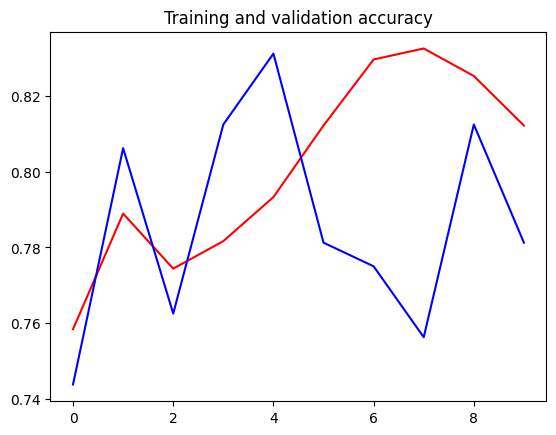

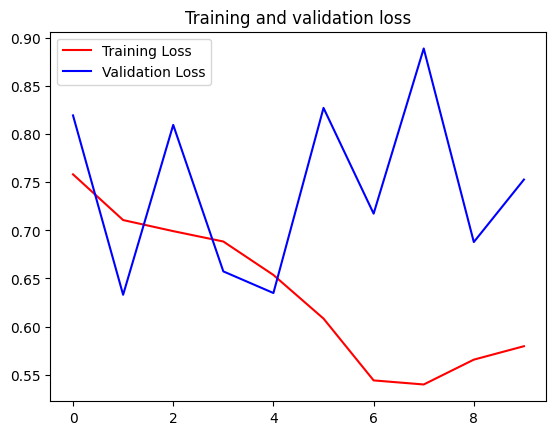

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

lr_schedule = LearningRateScheduler(lambda epoch: 0.01 / 10**(epoch / 5))

model2.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])

EPOCHS = 50

# Train the model
history2=model2.fit(
      train_generator,
      epochs=EPOCHS,validation_data=(valid_generator),
      verbose=2,callbacks=[earlystop])

Epoch 1/50
22/22 - 16s - loss: 2.9805 - accuracy: 0.1383 - val_loss: 2.9488 - val_accuracy: 0.2562 - 16s/epoch - 708ms/step
Epoch 2/50
22/22 - 14s - loss: 2.9496 - accuracy: 0.2518 - val_loss: 2.9096 - val_accuracy: 0.2750 - 14s/epoch - 629ms/step
Epoch 3/50
22/22 - 14s - loss: 2.9214 - accuracy: 0.2707 - val_loss: 2.8733 - val_accuracy: 0.2875 - 14s/epoch - 632ms/step
Epoch 4/50
22/22 - 14s - loss: 2.8934 - accuracy: 0.2926 - val_loss: 2.8383 - val_accuracy: 0.3063 - 14s/epoch - 630ms/step
Epoch 5/50
22/22 - 13s - loss: 2.8673 - accuracy: 0.2926 - val_loss: 2.8038 - val_accuracy: 0.3063 - 13s/epoch - 596ms/step
Epoch 6/50
22/22 - 13s - loss: 2.8469 - accuracy: 0.3130 - val_loss: 2.7714 - val_accuracy: 0.3187 - 13s/epoch - 607ms/step
Epoch 7/50
22/22 - 14s - loss: 2.8239 - accuracy: 0.3231 - val_loss: 2.7398 - val_accuracy: 0.3313 - 14s/epoch - 636ms/step
Epoch 8/50
22/22 - 14s - loss: 2.7976 - accuracy: 0.3057 - val_loss: 2.7073 - val_accuracy: 0.3375 - 14s/epoch - 626ms/step
Epoch 9/

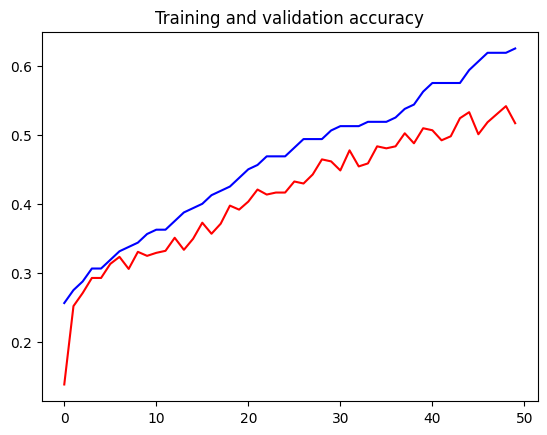

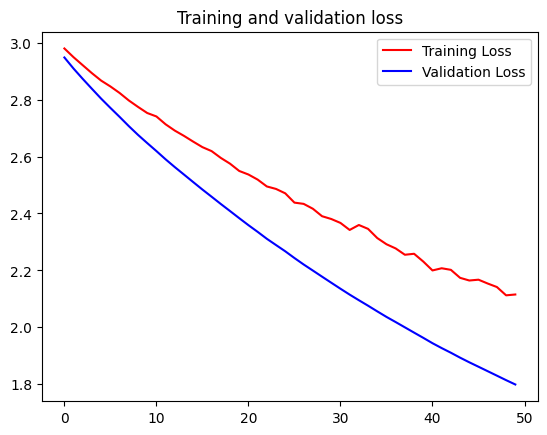

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

lr_schedule = LearningRateScheduler(lambda epoch: 0.01 / 10**(epoch / 5))

model3.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

EPOCHS = 50

# Train the model
history3=model3.fit(
      train_generator,
      epochs=EPOCHS,validation_data=(valid_generator),
      verbose=2,callbacks=[earlystop])

Epoch 1/50
22/22 - 17s - loss: 2.8468 - accuracy: 0.2460 - val_loss: 2.7569 - val_accuracy: 0.2688 - 17s/epoch - 772ms/step
Epoch 2/50
22/22 - 16s - loss: 2.8160 - accuracy: 0.2635 - val_loss: 2.7036 - val_accuracy: 0.2875 - 16s/epoch - 721ms/step
Epoch 3/50
22/22 - 14s - loss: 2.7679 - accuracy: 0.2940 - val_loss: 2.6532 - val_accuracy: 0.3187 - 14s/epoch - 657ms/step
Epoch 4/50
22/22 - 14s - loss: 2.7366 - accuracy: 0.3144 - val_loss: 2.6044 - val_accuracy: 0.3562 - 14s/epoch - 646ms/step
Epoch 5/50
22/22 - 14s - loss: 2.6992 - accuracy: 0.3450 - val_loss: 2.5575 - val_accuracy: 0.3938 - 14s/epoch - 638ms/step
Epoch 6/50
22/22 - 14s - loss: 2.6676 - accuracy: 0.3537 - val_loss: 2.5118 - val_accuracy: 0.4062 - 14s/epoch - 646ms/step
Epoch 7/50
22/22 - 15s - loss: 2.6371 - accuracy: 0.3974 - val_loss: 2.4665 - val_accuracy: 0.4313 - 15s/epoch - 663ms/step
Epoch 8/50
22/22 - 14s - loss: 2.5978 - accuracy: 0.4236 - val_loss: 2.4219 - val_accuracy: 0.4563 - 14s/epoch - 635ms/step
Epoch 9/

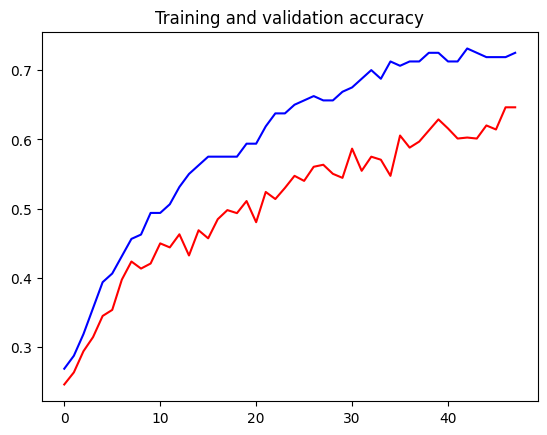

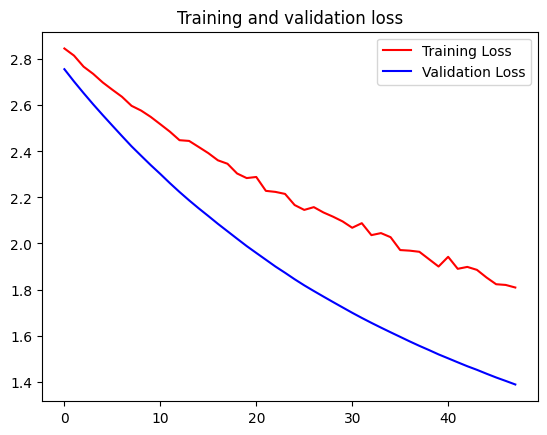

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# score = model.evaluate(valid_generator, verbose = 0)

# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

Test loss: 0.8675495386123657
Test accuracy: 0.7749999761581421


In [ ]:
# lr_history = adjust_learning_rate(train_generator,model)

Epoch 1/100
22/22 [==============================] - 14s 497ms/step - loss: 0.6550 - accuracy: 0.8049 - lr: 1.0000e-04
Epoch 2/100
22/22 [==============================] - 12s 535ms/step - loss: 0.6436 - accuracy: 0.8108 - lr: 1.1220e-04
Epoch 3/100
22/22 [==============================] - 11s 509ms/step - loss: 0.5923 - accuracy: 0.8166 - lr: 1.2589e-04
Epoch 4/100
22/22 [==============================] - 11s 496ms/step - loss: 0.6175 - accuracy: 0.8122 - lr: 1.4125e-04
Epoch 5/100
22/22 [==============================] - 13s 588ms/step - loss: 0.6036 - accuracy: 0.8108 - lr: 1.5849e-04
Epoch 6/100
22/22 [==============================] - 12s 542ms/step - loss: 0.5983 - accuracy: 0.8297 - lr: 1.7783e-04
Epoch 7/100
22/22 [==============================] - 13s 596ms/step - loss: 0.5511 - accuracy: 0.8370 - lr: 1.9953e-04
Epoch 8/100
22/22 [==============================] - 12s 530ms/step - loss: 0.5753 - accuracy: 0.8108 - lr: 2.2387e-04
Epoch 9/100
22/22 [=============================

In [ ]:
# from keras.optimizers import Adam
# model.compile(loss = 'categorical_crossentropy',
#               optimizer = Adam(learning_rate = 0.0018),
#               metrics = ['accuracy'])

In [ ]:
# EPOCHS = 20

# # Train the model
# history=model.fit(
#       train_generator,
#       epochs=EPOCHS,
#       verbose=2,
#       validation_data = (valid_generator))

Epoch 1/20
22/22 - 14s - loss: 8.7604 - accuracy: 0.0466 - val_loss: 8.6786 - val_accuracy: 0.0437 - 14s/epoch - 652ms/step
Epoch 2/20
22/22 - 13s - loss: 8.7145 - accuracy: 0.0466 - val_loss: 8.6333 - val_accuracy: 0.0437 - 13s/epoch - 594ms/step
Epoch 3/20
22/22 - 13s - loss: 8.6693 - accuracy: 0.0466 - val_loss: 8.5884 - val_accuracy: 0.0437 - 13s/epoch - 580ms/step
Epoch 4/20
22/22 - 12s - loss: 8.6243 - accuracy: 0.0466 - val_loss: 8.5434 - val_accuracy: 0.0437 - 12s/epoch - 538ms/step
Epoch 5/20
22/22 - 13s - loss: 8.5797 - accuracy: 0.0466 - val_loss: 8.4992 - val_accuracy: 0.0437 - 13s/epoch - 589ms/step
Epoch 6/20
22/22 - 13s - loss: 8.5351 - accuracy: 0.0466 - val_loss: 8.4556 - val_accuracy: 0.0437 - 13s/epoch - 599ms/step
Epoch 7/20
22/22 - 13s - loss: 8.4909 - accuracy: 0.0466 - val_loss: 8.4124 - val_accuracy: 0.0437 - 13s/epoch - 591ms/step
Epoch 8/20
22/22 - 12s - loss: 8.4477 - accuracy: 0.0466 - val_loss: 8.3696 - val_accuracy: 0.0437 - 12s/epoch - 531ms/step
Epoch 9/

In [ ]:
# EPOCHS = 20

# # Train the model
# history2=model2.fit(
#       train_generator,
#       epochs=EPOCHS,
#       verbose=2,
#       validation_data = (valid_generator))

Epoch 1/20
22/22 - 32s - loss: 2.9946 - accuracy: 0.0699 - val_loss: 2.9921 - val_accuracy: 0.0875 - 32s/epoch - 1s/step
Epoch 2/20
22/22 - 15s - loss: 2.9917 - accuracy: 0.0815 - val_loss: 2.9894 - val_accuracy: 0.0875 - 15s/epoch - 680ms/step
Epoch 3/20
22/22 - 15s - loss: 2.9894 - accuracy: 0.0815 - val_loss: 2.9868 - val_accuracy: 0.0875 - 15s/epoch - 677ms/step
Epoch 4/20
22/22 - 15s - loss: 2.9872 - accuracy: 0.0815 - val_loss: 2.9845 - val_accuracy: 0.0875 - 15s/epoch - 672ms/step
Epoch 5/20
22/22 - 16s - loss: 2.9852 - accuracy: 0.0815 - val_loss: 2.9822 - val_accuracy: 0.0875 - 16s/epoch - 705ms/step
Epoch 6/20
22/22 - 15s - loss: 2.9833 - accuracy: 0.0815 - val_loss: 2.9799 - val_accuracy: 0.0875 - 15s/epoch - 688ms/step
Epoch 7/20
22/22 - 15s - loss: 2.9813 - accuracy: 0.0815 - val_loss: 2.9777 - val_accuracy: 0.0875 - 15s/epoch - 695ms/step
Epoch 8/20
22/22 - 15s - loss: 2.9795 - accuracy: 0.0728 - val_loss: 2.9757 - val_accuracy: 0.0875 - 15s/epoch - 684ms/step
Epoch 9/20


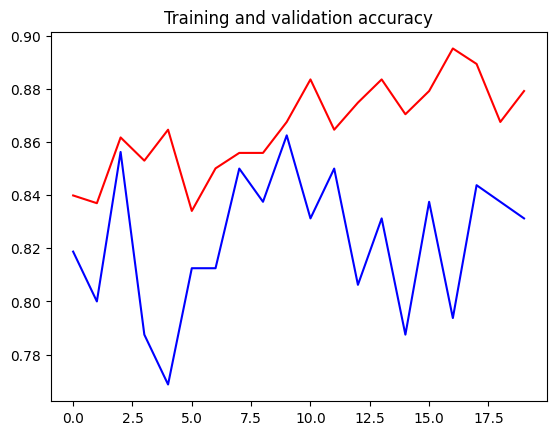

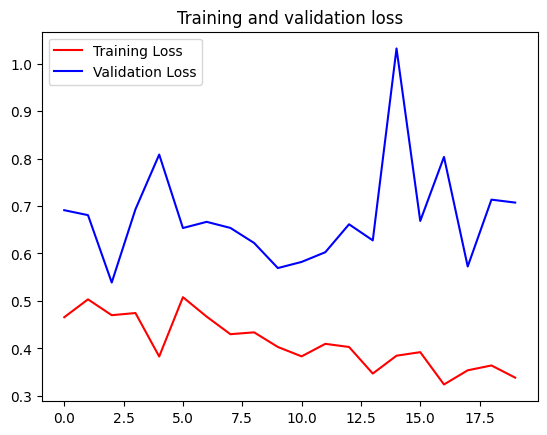

In [ ]:
# import matplotlib.pyplot as plt

# # Plot the model results
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')

# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

In [ ]:
# |from keras.optimizers import RMSprop
# from keras.callbacks import ModelCheckpoint, EarlyStopping


# checkpoint = ModelCheckpoint("face recognisation.h5",
#                              monitor="val_accuracy",
#                              mode="min",
#                              save_best_only = True,
#                              verbose=1)

# earlystop = EarlyStopping(monitor = 'val_accuracy',
#                           min_delta = 0,
#                           patience = 3,
#                           verbose = 1,
#                           restore_best_weights = True)

# # we put our call backs into a callback list
# callbacks = [earlystop, checkpoint]

# # We use a very small learning rate
# model.compile(loss = 'categorical_crossentropy',
#               optimizer = RMSprop(lr = 0.001),
#               metrics = ['accuracy'])

# # Enter the number of training and validation samples here
# nb_train_samples = 108
# nb_validation_samples = 52

# # We only train 5 EPOCHS
# epochs = 25
# batch_size = 16

# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch = nb_train_samples // batch_size,
#     epochs = epochs,
#     callbacks = callbacks,
#     validation_data = valid_generator,
#     validation_steps = nb_validation_samples // batch_size)


<ipython-input-37-d10d082f80f2>:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
6/6 [==============================] - ETA: 0s - loss: 1.3896 - accuracy: 0.6302
Epoch 1: val_accuracy improved from inf to 0.73958, saving model to face recognisation.h5
6/6 [==============================] - 6s 812ms/step - loss: 1.3896 - accuracy: 0.6302 - val_loss: 0.7686 - val_accuracy: 0.7396
Epoch 2/25
6/6 [==============================] - ETA: 0s - loss: 0.6283 - accuracy: 0.8073
Epoch 2: val_accuracy did not improve from 0.73958
6/6 [==============================] - 5s 790ms/step - loss: 0.6283 - accuracy: 0.8073 - val_loss: 0.6232 - val_accuracy: 0.8229
Epoch 3/25
6/6 [==============================] - ETA: 0s - loss: 0.7770 - accuracy: 0.7500
Epoch 3: val_accuracy did not improve from 0.73958
6/6 [==============================] - 5s 889ms/step - loss: 0.7770 - accuracy: 0.7500 - val_loss: 0.9133 - val_accuracy: 0.7396
Epoch 4/25
6/6 [==============================] - ETA: 0s - loss: 0.5271 - accuracy: 0.8281
Epoch 4: val_accuracy did not improve from 0.73958
6/

In [ ]:
# creates a HDF5 file
model1.save(
    '/content/drive/MyDrive/Face Recognition Sistem Parkir V3/transfer_learning_trained' +
    '_face_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# deletes the existing model
del model

# returns a compiled model identical to the previous one
model = load_model(
    'transfer_learning_trained' +
    '_face_cnn_model.h5')


In [ ]:
import pickle

class_dictionary = train_generator.class_indices
class_dictionary = {
    value:key for key, value in class_dictionary.items()
}
print(class_dictionary)


{0: 'Agus Dwi', 1: 'Agus Tresna', 2: 'Alisiya', 3: 'Ami', 4: 'Aul', 5: 'Dadi', 6: 'Gede Andhika', 7: 'Ibul', 8: 'Kak Utak', 9: 'Ken', 10: 'Melki', 11: 'Nanta', 12: 'Naufal Azmi', 13: 'Permadi', 14: 'Risman', 15: 'Ryan', 16: 'Saipul', 17: 'Sindang Alamsyah', 18: 'Tyok', 19: 'Zidan'}


In [ ]:
# save the class dictionary to pickle
face_label_filename = '/content/drive/MyDrive/Face Recognition Sistem Parkir V3/face-labels.pickle'
with open(face_label_filename, 'wb') as f: pickle.dump(class_dictionary, f)


In [ ]:
import cv2
import os
import pickle
import numpy as np
import pickle

from PIL import Image
import matplotlib.pyplot as plt
from keras_vggface import utils

# dimension of images
image_width = 224
image_height = 224

# load the training labels
face_label_filename = 'face-labels.pickle'
with open(face_label_filename, "rb") as \
    f: class_dictionary = pickle.load(f)

class_list = [value for _, value in class_dictionary.items()]
print(class_list)


['Arsan', 'Bang Giri', 'Bapak Polo Biru Nmax Biru Gonceng Cewek', 'Cowok Baju Item Vario Item Celana Jeans Digulung', 'MasMas Baju Hitam Helm Putih Supra Hitem', 'MasMas Baju Lengan Panjang Biru Topi Vario Hitam', 'MasMas Bomber-H Hitem PCX Hitam', 'MasMas Celana Pendek Digonceng Temen Vario Putih', 'MasMas Flanel Agak Berisi PCX Hitam Sepatu Putih', 'MasMas Gondrong Kaos Hitam Polos Vario Hitam', 'MasMas Hoodie Hijau Soul Merah', 'MasMas Jaket Biru Helm Tanpa Kaca Supra Hitam Silver', 'MasMas Jaket Hijau Beat Street Hitam Gonceng Mbak Cici', 'MasMas Jaket Hitam Beat Merah', 'MasMas Jaket Hitam Scoopy Hitam', 'MasMas Jaket Merah Supra Hitam', 'MasMas Jaket Scoopy Biru Gonceng Cewek Jilbab Kuning', 'MasMas Kacamata Baju PDH Biru Roda Dalem Kuning Gonceng Cewek', 'MasMas Kaos Hitam Vario Putih Gonceng Temen', 'MasMas Kemeja Biru Helm Biru Supra Hitam', 'MasMas Kemeja Biru Lanyard Helm Merah Scoopy Merah', 'MasMas Topi Baju Biru Vario Hitam', 'MasMas Topi Jaket Biru Vario Putih', 'Mbak Ci

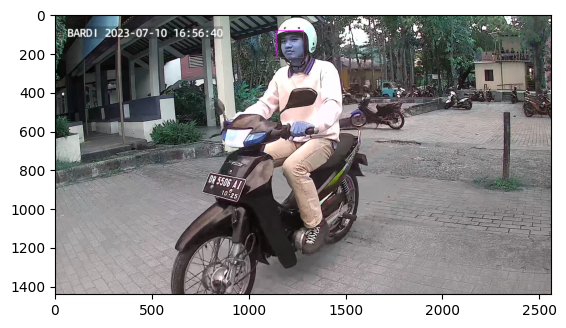

1/1 [==============================] - 1s 657ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
44
Predicted face: Permadi



In [ ]:
from keras.utils import img_to_array
# for detecting faces
facecascade =  cv2.CascadeClassifier(
    'haarcascade_frontalface_default.xml')

for i in range(1,4): test_image_filename = f'./facetest/face{i}.jpg'

# load the image
imgtest = cv2.imread(test_image_filename, cv2.IMREAD_COLOR)
image_array = np.array(imgtest, "uint8")

# get the faces detected in the image
faces = facecascade.detectMultiScale(imgtest,
    scaleFactor=1.1, minNeighbors=5)

# if not exactly 1 face is detected, skip this photo
if len(faces) != 1:
    print(f'---We need exactly 1 face; photo skipped---')
    print()

for (x_, y_, w, h) in faces:
    # draw the face detected
    face_detect = cv2.rectangle(
        imgtest, (x_, y_), (x_+w, y_+h), (255, 0, 255), 2)
    plt.imshow(face_detect)
    plt.show()

    # resize the detected face to 224x224
    size = (image_width, image_height)
    roi = image_array[y_: y_ + h, x_: x_ + w]
    resized_image = cv2.resize(roi, size)

    # prepare the image for prediction
    x = img_to_array(resized_image)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1)

    # making prediction
    predicted_prob = model.predict(x)
    print(predicted_prob)
    print(predicted_prob[0].argmax())
    print("Predicted face: " + class_list[predicted_prob[0].argmax()])
    print("============================\n")



In [ ]:
from PIL import Image
import numpy as np
import cv2
import pickle
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# for face detection
face_cascade = cv2.CascadeClassifier(
    '/content/drive/MyDrive/Face Recognition Sistem Parkir V3/haarcascade_frontalface_default.xml')

# size of the image to predict
image_width = 224
image_height = 224

# load the trained model
model = load_model('/content/drive/MyDrive/Face Recognition Sistem Parkir V3/transfer_learning_trained_face_cnn_model.h5')

# the labels for the trained model
with open("/content/drive/MyDrive/Face Recognition Sistem Parkir V3/face-labels.pickle", 'rb') as f:
    og_labels = pickle.load(f)
    labels = {key: value for key, value in og_labels.items()}
    print(labels)

# Open the MP4 video file
video_path = '/content/drive/MyDrive/Face Recognition Sistem Parkir V3/tes.mp4'
cap = cv2.VideoCapture(video_path)

# Define the output video settings
output_path = '/content/drive/MyDrive/Face Recognition Sistem Parkir V3/output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, 30.0, (640, 480))  # Change resolution as needed

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Break the loop if we have reached the end of the video
    if not ret:
        break

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # try to detect faces in the frame
    faces = face_cascade.detectMultiScale(
        rgb, scaleFactor=1.3, minNeighbors=5)

    # for each face found
    for (x, y, w, h) in faces:
        roi_rgb = rgb[y:y+h, x:x+w]

        # Draw a rectangle around the face
        color = (255, 0, 0)  # in BGR
        stroke = 2
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, stroke)

        # resize the image
        size = (image_width, image_height)
        resized_image = cv2.resize(roi_rgb, size)
        image_array = np.array(resized_image, "uint8")
        img = image_array.reshape(1, image_width, image_height, 3)
        img = img.astype('float32')
        img /= 255

        # predict the image
        predicted_prob = model.predict(img)

        # Display the label
        font = cv2.FONT_HERSHEY_SIMPLEX
        name = labels[predicted_prob[0].argmax()]
        color = (255, 0, 255)
        stroke = 2
        cv2.putText(frame, f'({name})', (x, y - 8),
                    font, 1, color, stroke, cv2.LINE_AA)

    # Write the frame to the output video
    out.write(frame)

    # Show the frame with predictions in Colab
    cv2_imshow(frame)

    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):  # Press q to break out of the loop
        break

# Cleanup
cap.release()
out.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

